# TUGAS
Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**
* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

* Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Pengumpulan Tugas**

Tugas praktikum ini dikumpulkan dalam bentuk laporan berformat dokumen (.doc) dan kode program Python yang digunakan (dalam format .py atau .ipynb). Tugas dikumpulkan ke dosen pengampu sesuai dengan jadwal yang telah ditentukan.

Selamat mengerjakan tugas praktikum! Jika Anda mengalami kesulitan, jangan ragu untuk berkonsultasi dengan dosen pengampu


# JAWABAN
**1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

Dataset dimuat menggunakan library pandas, kemudian dilakukan seleksi fitur untuk memilih variabel mana saja yang akan digunakan. Dalam hal ini variabel yang akan diproses adalah variabel 'age', 'bmi', 'children', 'smoker', 'region', dan 'charges' karena variabel-variabel tersebut adalah variabel yang berpengaruh terhadap biaya pengobatan

In [27]:
# Load library
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('insurance.csv')

# Seleksi Fitur
data = data[
    ['age', 'bmi', 'children', 'smoker', 'region', 'charges']]

data.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520


Variabel 'smoker', dan 'region' di-encode ke dalam bentuk numerik menggunakan LabelEncoder karena model regresi bekerja menggunakan data dalam bentuk numerik.

In [29]:
# Encoding
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520


* Variabel Bebas (Fitur): 'age', 'bmi', 'children', 'smoker', dan 'region' karena umur, indeks masa tubuh, jumlah anak, status perokok, dan wilayah dapat mempengaruhi biaya medis pasien.
* Variabel Target (Biaya Medis Personal): 'charges' karena mewakili biaya medis personal yang didapat dari hasil proses pengobatan yang dilakukan dan merupakan variabel yang ingin dipredisksi / dijelaskan oleh model regresi.

In [30]:
# Identifikasi variabel bebas dan target
X = data[['age', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

data.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520


**2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

Dataset dibagi menjadi data latih (80%), dan data uji (20%) menggunakan train_test_split. Dimana data latih digunakan untuk melatih model, dan sata uji digunakan untuk mengevaluasi model.

In [31]:
# Load Library
from sklearn.model_selection import train_test_split  

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan data latih (X_train)
print("Data Latih: ")
print(X_train.head())

# Tampilkan data uji (X_test)
print("\nData Uji: ")
print(X_test.head())

# Tampilkan target data latih (y_train)
print("\nTarget Data Latih: ")
print(y_train.head())

# Tampilkan target data uji (y_test)
print("\nTarget Data Uji: ")
print(y_test.head())

Data Latih: 
      age    bmi  children  smoker  region
560    46  19.95         2       0       1
1285   47  24.32         0       0       0
1142   52  24.86         0       0       2
969    39  34.32         5       0       2
486    54  21.47         3       0       1

Data Uji: 
      age     bmi  children  smoker  region
764    45  25.175         2       0       0
887    36  30.020         0       0       1
890    64  26.885         0       1       1
1293   46  25.745         3       0       1
259    19  31.920         0       1       1

Target Data Latih: 
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

Target Data Uji: 
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64


**Data Latih**

Data yang digunakan untuk melatih model, agar model dapat mengenali pola antar fitur (variabel bebas), dan variabel target (biaya medis). Dengan penjelasan sebagai berikut,
* age: Usia pasien
* bmi: Indeks massa tubuh yang mengukur proporsi berat badan terhadap tinggi badan
* children: Jumlah anak yang dimiliki pasien
* smoker: Status merokok pasien, dimana 0 berarti tidak merokok, dan 1 berarti merokok
* region: Wilayah, dimana data telah di-encode menjadi angka (0, 1, 2)

**Data Uji**

Data yang digunakan untuk memvalidasi model yang telah dilatih, dan membantu mengevaluasi seberapa baik model tersebut mampu memprediksi biaya medis berdasarkan fitur yang diberikan.

**Target Data Latih**

Target data latih menunjukkan biaya medis untuk data latih (data pasien yang ada di bagian "Data Latih"). Misalnya, individu pada baris 560 yang berusia 46 tahun, memiliki BMI 19.95, dua anak, tidak merokok, dan tinggal di wilayah 1, memiliki biaya medis sebesar 9193.84.

**Target Data Uji**

Menunjukkan biaya medis dari rata uji yang digunakan untuk membandingkan dengan prediksi model. Misalnya, individu dengan ID 890 yang berusia 64 tahun, memiliki BMI 26.88, tidak memiliki anak, merokok, dan tinggal di wilayah 1, memiliki biaya medis sebesar 29330.98.


**3. Lakukan feature scaling jika diperlukan.**

Feature scaling dilakukan untuk memastikan bahwa variabel numerik ('age', 'bmi', 'children') berada dalam skala yang sama, sehingga tidak ada variabel yang mendominasi model. Variabel 'smoker', dan 'region' tidak perlu dilakukan feature scaling karena sudah dalam bentuk numerik.

In [40]:
# Load Library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scaling pada numeric features: 'age', 'bmi', 'children'
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test_scaled[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

# Tampilkan hasil scaling
print(X_train_scaled.head())

           age       bmi  children  smoker  region
560   0.472227 -1.756525  0.734336       0       1
1285  0.543313 -1.033082 -0.911192       0       0
1142  0.898745 -0.943687 -0.911192       0       2
969  -0.025379  0.622393  3.202629       0       2
486   1.040918 -1.504893  1.557100       0       1


**age**

Setelah scaling, usia yang awalnya berada dalam skala yang lebih besar (misalnya usia 46, 47 tahun) telah diubah menjadi skala yang lebih kecil dengan rata-rata 0. Misalnya, individu pada baris 560 yang usianya 46 tahun setelah di-scaling menjadi 0.472227.

**bmi**

Body Mass Index (BMI) di-scaling. Misalnya, individu pada baris 560 dengan BMI asli 19.95 setelah di-scaling menjadi -1.756525. Nilai negatif menunjukkan bahwa BMI individu tersebut berada di bawah rata-rata dari seluruh data.

**children**

Jumlah anak juga telah diubah skalanya. Misalnya, individu pada baris 560 memiliki 2 anak, dan setelah di-scaling nilainya menjadi 0.734336.


**smoker dan region**

Kedua fitur ini tidak di-scaling karena sudah diubah menjadi nilai numerik melalui proses encoding, dan mereka adalah fitur kategorikal (binary untuk smoker dan encoded untuk region). Nilai smoker tetap 0 atau 1, dan nilai region juga tetap 0, 1, atau 2 sesuai wilayah individu.

**4. Buat model multiple linear regression menggunakan Scikit-Learn.**

Model multiple linear regression dibuat menggunakan LinearRegression dari Scikit-Learn.

In [41]:
# Load Library
from sklearn.linear_model import LinearRegression

# Buat model regresi linear
model = LinearRegression()

**5. Latih model pada data latih dan lakukan prediksi pada data uji.**

Model dilatih menggunakan data latih, kemudian dilakukan prediksi biaya medis pada data uji.

In [38]:
# Latih model pada data latih
model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

**6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

Evaluasi model dilakukan menggunakan R-squared, Mean Squared Error (MSE), dan Mean Absolute Error (MAE).

* R-squared: mengukur seberapa baik variabel bebas dapat menjelaskan variasi pada variabel target.
* MSE: mengukur rata-rata kuadrat kesalahan prediksi.
* MAE: mengukur rata-rata kesalahan absolut dari prediksi.

In [46]:
# Load Library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hitung R-squared
r2 = r2_score(y_test, y_pred)

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: 0.7833112270019789
Mean Squared Error (MSE): 33640657.13645164
Mean Absolute Error (MAE): 4187.322474715382


**Visualisasi data**

Mengetahui hubungan antara fitur 'age' (usia) dengan 'charges' (biaya medis)

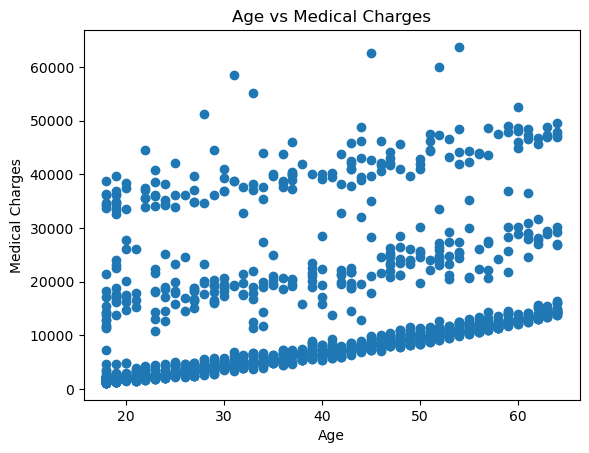

In [48]:
import matplotlib.pyplot as plt

# Scatter plot antara umur dan biaya medis
plt.scatter(X['age'], y)
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.title('Age vs Medical Charges')
plt.show()


Mengetahui hubungan antara fitur 'bmi' (indeks masa tubuh) dengan 'charges' (biaya medis)

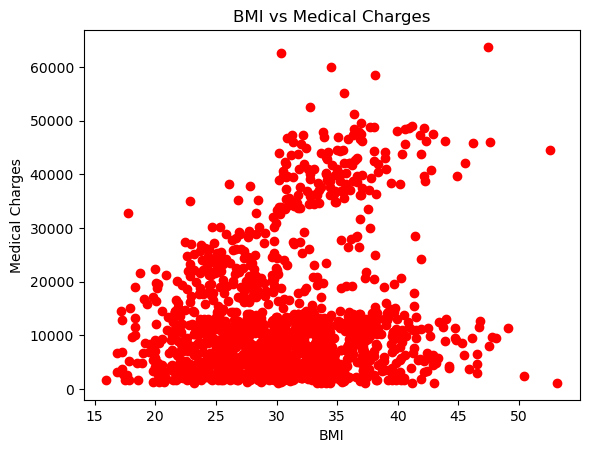

In [43]:
# Scatter plot antara BMI dan biaya medis
plt.scatter(X['bmi'], y, color='red')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.title('BMI vs Medical Charges')
plt.show()